# Context

**Input**:

NetworkX Directed Graph data

**Output**:

Standardized swc files (www.neuromorpho.org)

[SWC specification](http://www.neuronland.org/NLMorphologyConverter/MorphologyFormats/SWC/Spec.html)

# To Do:
[ ] Filtering the data out of redudant nodes

[ ] Add soma section* from graph[soma_shell]

*see [soma docs](https://docs.arbor-sim.org/en/stable/fileformat/swc.html)

In [667]:
import visualization as vis
import pickle
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from astropy.io import ascii
from astropy.table import Table

In [616]:
filename = '3wk-both1-grn-raw.pic-sequential_graph.pickle'
data = pd.read_pickle(filename)

In [617]:
# graph stuff
def get_tips(g):
    return {n for n in g.nodes if len(list(g.successors(n))) == 0}
            
def get_roots(g):
    return {n for n in g.nodes if len(list(g.predecessors(n))) < 1}

def get_branch_points(g):
    return {n for n in g.nodes if len(list(g.successors(n))) > 1}       

# Note: neighbors() == successors() 

In [668]:
r = get_roots(data)
t = get_tips(data)
b = get_branch_points(data)

data_paths = vis.graph_to_paths(data)
print(f'Keys:{data_paths.keys()}', '\n',  f'\nRoots: {r}')


Keys:dict_keys([(38, 202, 203), (36, 211, 176), (37, 206, 180), (39, 201, 201), (36, 208, 179), (34, 246, 199), (40, 204, 199), (34, 246, 202), (35, 216, 202), (39, 198, 198), (36, 212, 176), (36, 248, 178), (37, 209, 177), (35, 246, 203), (37, 214, 176), (36, 206, 181), (37, 217, 202), (39, 199, 196), (37, 208, 178), (40, 223, 178), (39, 199, 199)]) 
 
Roots: {(38, 202, 203), (36, 211, 176), (37, 206, 180), (39, 201, 201), (36, 208, 179), (34, 246, 199), (40, 204, 199), (34, 246, 202), (35, 216, 202), (39, 198, 198), (36, 212, 176), (36, 248, 178), (37, 209, 177), (35, 246, 203), (37, 214, 176), (36, 206, 181), (37, 217, 202), (39, 199, 196), (37, 208, 178), (40, 223, 178), (39, 199, 199)}


In [670]:
root = data_paths[(38, 202, 203)]

In [671]:
#We've got 7 times increased detalization than usual SWC contain
range(len(data))

range(0, 6911)

In [672]:
list(data.nodes.data())[0]

((39, 145, 130),
 {'root': (37, 206, 180),
  'occurence': 6.860663671448287,
  'sigma_mask': 5.656854249492381,
  'sigma_opt': 4.0})

In [624]:
list(data.edges.data())[0]

((39, 145, 130), (39, 144, 129), {'weight': 1})

In [625]:
list(data.nodes.data('root'))

[((39, 145, 130), (37, 206, 180)),
 ((37, 203, 215), (38, 202, 203)),
 ((26, 257, 235), (35, 246, 203)),
 ((45, 153, 148), (37, 206, 180)),
 ((31, 202, 92), (36, 211, 176)),
 ((48, 188, 251), (39, 198, 198)),
 ((27, 258, 204), (34, 246, 199)),
 ((30, 247, 131), (36, 212, 176)),
 ((37, 181, 89), (36, 211, 176)),
 ((44, 166, 154), (37, 206, 180)),
 ((28, 192, 140), (36, 211, 176)),
 ((37, 285, 146), (36, 248, 178)),
 ((35, 195, 259), (38, 202, 203)),
 ((44, 121, 88), (37, 206, 180)),
 ((28, 245, 151), (36, 212, 176)),
 ((27, 197, 86), (36, 211, 176)),
 ((33, 179, 115), (36, 211, 176)),
 ((39, 148, 148), (37, 206, 180)),
 ((43, 113, 95), (37, 206, 180)),
 ((47, 108, 150), (39, 198, 198)),
 ((34, 171, 79), (36, 211, 176)),
 ((45, 229, 156), (40, 223, 178)),
 ((29, 169, 102), (36, 211, 176)),
 ((34, 256, 123), (36, 212, 176)),
 ((30, 214, 196), (36, 206, 181)),
 ((36, 291, 172), (36, 248, 178)),
 ((32, 223, 218), (35, 216, 202)),
 ((30, 290, 191), (35, 246, 203)),
 ((31, 266, 211), (35, 246

In [626]:
import random
node = random.choice(list(data.nodes()))
node

(34, 252, 209)

In [627]:
def find_root(node, graph, steps=0):
    parent = list(graph.predecessors(node))
    
    if not parent:
            return list(node), f'Steps = {steps}'
    
    else: 
        steps += 1
        for i in parent:
            return find_root(i, graph, steps)


In [628]:
list(find_root((27, 272, 204), data))

[[35, 246, 203], 'Steps = 30']

In [629]:
root = nx.get_node_attributes(data, "root")
root[(27, 272, 204)]

(35, 246, 203)

In [630]:
coords = [i[0] for i in data.nodes.data()]
all_roots = [i[1]["root"] for i in data.nodes.data()]

In [631]:
mask = (np.array(all_roots)[:,0]==40) & (np.array(all_roots)[:,1]==223) & (np.array(all_roots)[:,2]==178)
new_root = np.array(coords)[mask]
new_root = [tuple(i) for i in new_root]


In [632]:
mask

array([False, False, False, ..., False, False, False])

In [633]:
adj = nx.adjacency_matrix(data).todense()


/tmp/ipykernel_7510/3306571992.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(data).todense()


# Actual code

In [634]:

def related_tips(graph, root):
    
    # collect tree nodes
    coords = [i[0] for i in graph.nodes.data()]
    all_roots = [i[1]["root"] for i in graph.nodes.data()]
    
    #create root-specialized mask
    x, y, z = root
    root_mask = (np.array(all_roots)[:,0]==x) & (np.array(all_roots)[:,1]==y) & (np.array(all_roots)[:,2]==z)
    root_nodes = [tuple(i) for i in np.array(coords)[root_mask]]
    
    #get all tips
    my_tips = np.array(list(get_tips(graph)))
    
    #filter tips
    root_tips = []

    for tip in my_tips:
        tip = tuple(tip)
        
        if tip in root_nodes:
            root_tips.append(tip)
            
    return root_tips
        

In [635]:

len(related_tips(data, (35, 246, 203)))

44

In [636]:
D = {}
count = 1
r = (35, 246, 203)


In [637]:
D[r] = (0, -1)
for t in related_tips(data, r):
    for n in list(nx.shortest_path(data, source=r, target=t))[1:]:
        if n in D:
            continue
        else:
            num = count
             #parent name
            p_name = nx.predecessor(data, r, n)
            parent = D[p_name[0]][0]

            D[n] = (num, parent)
            count+=1
            

In [638]:
D

{(35, 246, 203): (0, -1),
 (35, 247, 204): (1, 0),
 (35, 248, 205): (2, 1),
 (35, 249, 206): (3, 2),
 (34, 250, 207): (4, 3),
 (34, 251, 208): (5, 4),
 (34, 252, 209): (6, 5),
 (33, 253, 210): (7, 6),
 (32, 254, 211): (8, 7),
 (31, 255, 212): (9, 8),
 (31, 256, 212): (10, 9),
 (31, 257, 212): (11, 10),
 (31, 258, 212): (12, 11),
 (31, 259, 213): (13, 12),
 (31, 260, 214): (14, 13),
 (31, 261, 215): (15, 14),
 (31, 262, 216): (16, 15),
 (31, 263, 217): (17, 16),
 (31, 264, 218): (18, 17),
 (30, 265, 219): (19, 18),
 (30, 266, 220): (20, 19),
 (29, 267, 221): (21, 20),
 (28, 268, 222): (22, 21),
 (27, 268, 223): (23, 22),
 (26, 268, 224): (24, 23),
 (26, 268, 225): (25, 24),
 (26, 268, 226): (26, 25),
 (26, 268, 227): (27, 26),
 (26, 268, 228): (28, 27),
 (26, 268, 229): (29, 28),
 (25, 267, 230): (30, 29),
 (25, 267, 229): (31, 30),
 (25, 268, 228): (32, 31),
 (25, 269, 227): (33, 32),
 (24, 270, 226): (34, 33),
 (23, 271, 225): (35, 34),
 (23, 272, 225): (36, 35),
 (23, 273, 224): (37,

In [639]:

def root_travel(graph, root):
    
    root_path = {}
    root_path[root] = (1, -1)
    count = 2
    
    tips = related_tips(graph, root)
    
    for tip in tips:
        for n in list(nx.shortest_path(graph, source=root, target=tip))[1:]:
            if n in root_path:
                continue
            
            else:
                num = count
                #parent name
                #return list with name of parent node
                p_name = nx.predecessor(graph, root, n)
                parent = root_path[p_name[0]][0]
                root_path[n] = (num, parent)
                count+=1
                
    return root_path


In [640]:
test_travel = root_travel(data, r)

In [641]:
r not in test_travel

False

In [644]:
max(test_travel.values())

(789, 788)

In [673]:
roots = get_roots(data)

In [674]:
roots = [r for r in roots]

In [676]:
rx = list((map(lambda x: x[0], roots)))
ry = list((map(lambda x: x[1], roots)))
rz = list((map(lambda x: x[2], roots)))

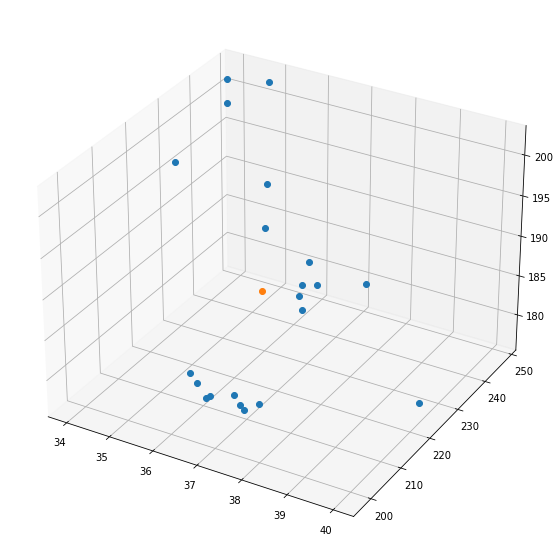

In [677]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(rx, ry, rz, 'o')
ax.plot(np.average(rx), np.average(ry), np.average(rz), 'o')

In [649]:
def roots_convergence(roots):
    roots = [r for r in roots]
    x = list((map(lambda x: x[0], roots)))
    y = list((map(lambda x: x[1], roots)))
    z = list((map(lambda x: x[2], roots)))

    return (np.average(x), np.average(y), np.average(z))


In [650]:
roots_convergence(roots)

(37.0, 215.1904761904762, 189.66666666666666)

In [651]:

def Merge_astrocyte(graph, convergence = False):
    
    roots  = get_roots(data)
    collection = []
    
    if convergence == True:
        #connect all roots for continuous structure
        convergence = {roots_convergence(roots): (1, -1)}
        collection.append(convergence)

    
    for r in tqdm(roots):
        visit = root_travel(data, r)
        
        #write first root 
        if not collection:
            collection.append(visit)
        
        #write subsequent roots with updated vals
        else:
            value = max(collection[-1].values())[0]
            
            for i in visit.items():
                
                #check if current node is root
                if i[0] is not r:
                    new_pos = i[1][0] + value
                    new_par = i[1][1] + value
                    visit[i[0]] = (new_pos, new_par)
                    
                else:
                    new_pos = i[1][0] + value
                    # new_par = i[1][1]
                    new_par = 1
                    visit[i[0]] = (new_pos, new_par)
                    
            collection.append(visit)
        
    return collection

In [652]:
M = Merge_astrocyte(data, convergence=True)

100%|███████████████████████████████████████████| 21/21 [00:09<00:00,  2.24it/s]


In [653]:
max(M[-1].values())

(6912, 6911)

In [656]:
dd = Table()

In [519]:
X = []
Y = []
Z = []
POS = []
PAR = []

for r in M:
    for n in r.items():
        x, y, z = n[0]
        X.append(x)
        Y.append(y)
        Z.append(z)
        pos, par = n[1]
        POS.append(pos)
        PAR.append(par)

In [520]:
dd['X'] = np.array(X)
dd['Y'] = np.array(Y)
dd['Z'] = np.array(Z)
dd['index'] = np.array(POS)
dd['parent'] = np.array(PAR)

In [521]:
dd


X,Y,Z,index,parent
float64,float64,float64,int64,int64
37.0,215.1904761904762,189.66666666666666,1,-1
38.0,202.0,203.0,2,1
38.0,201.0,204.0,3,2
38.0,200.0,205.0,4,3
38.0,199.0,206.0,5,4
38.0,199.0,207.0,6,5
...,...,...,...,...
40.0,202.0,267.0,6906,6905
40.0,203.0,268.0,6907,6906


*Woohoo!!!*


In [678]:
def SWC_from_Graph(graph, cell_type, filename):
    
    astro = Merge_astrocyte(graph)
    lines = []
    credits = '# Created by Anya :))\n'
    keys = ['# index ', 'type ', 'X ', 'Y ', 'Z ', 'radius ', 'parent', '\n']
    ntype = cell_type
    soma = 1
    radius = 0.125
    
#     #txt version
#     with open(f'{filename}.swc', 'w') as f:
#         # f.write(credits)
#         # f.writelines(keys)
        
#         for r in astro:
#             for n in r.items():
#                 x, y, z = n[0]
#                 index, par = n[1]

#                 f.writelines([f'{index} ', f'{ntype} ',
#                               f'{x} ', f'{y} ', f'{z} ', 
#                              f'{radius} ', f'{par}', '\n'])
    
    #ascii version
    data = Table()

    X = []
    Y = []
    Z = []
    POS = []
    PAR = []

    for r in astro:
        for n in r.items():
            x, y, z = n[0]
            X.append(x)
            Y.append(y)
            Z.append(z)
            pos, par = n[1]
            POS.append(pos)
            PAR.append(par)

    data['# index'] = np.array(POS)
    data['type'] = ntype
    data['X'] = np.array(X)
    data['Y'] = np.array(Y)
    data['Z'] = np.array(Z)
    data['radius'] = radius
    data['parent'] = np.array(PAR)

    data.write('3wk-both1-grn-raw.swc', format='ascii', overwrite=True) 
    

In [551]:
SWC_from_Graph(data, 7, 'Astro')

100%|███████████████████████████████████████████| 21/21 [00:08<00:00,  2.39it/s]


# Test

In [663]:
import tmd 
from tmd.view import view, plot
import morphio
import sys
import morphio 
import neurom as nm
from neurom.view import matplotlib_impl, matplotlib_utils

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [664]:
neuromorpho = '/home/anna/Documents/jupy_projects/TMD_test/Astro-10_2.CNG.swc'

In [583]:
morphology = morphio.mut.Morphology('3wk-both1-grn-raw.swc')

In [584]:
cell = tmd.io.load_neuron('3wk-both1-grn-raw.swc', remove_duplicates=True)

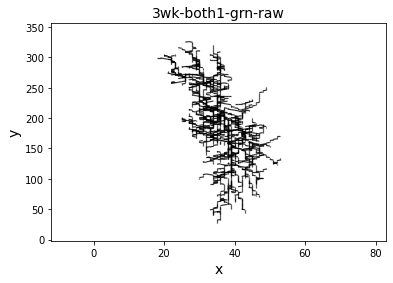

In [657]:
view.neuron(cell, nosoma=True, diameter=False)
# plt.savefig('cell.png', dpi=300)

In [658]:
ph_astro = tmd.methods.get_ph_neuron(cell)


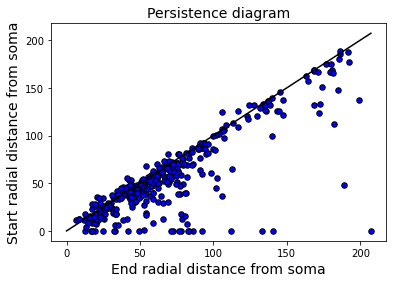

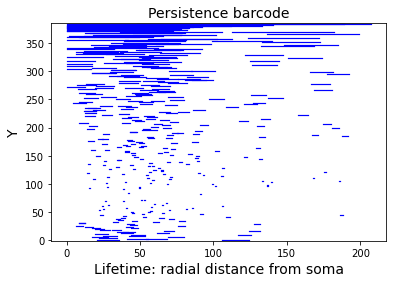

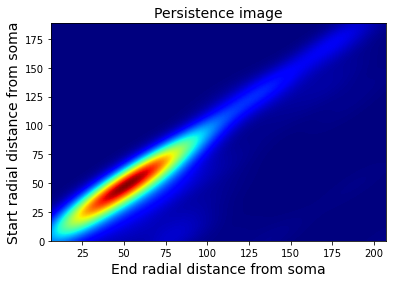

In [660]:
plot.diagram(ph_astro, subplot=True)
plt.savefig('diagram.png', dpi=300)

plot.barcode(ph_astro, subplot=True)
plt.savefig('barcode.png', dpi=300)

plot.persistence_image(ph_astro, subplot=True)
plt.savefig('persistence_image.png', dpi=300)

In [588]:
m = nm.io.utils.load_morphology('3wk-both1-grn-raw.swc')
m

Morphology <soma: SomaSinglePoint(array([[3.80e+01, 2.02e+02, 2.03e+02, 1.25e-01]], dtype=float32)) <center: [ 38. 202. 203.], radius: 0.125>, n_neurites: 22>

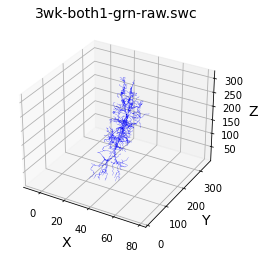

In [661]:

matplotlib_impl.plot_morph3d(m, color='blue')
plt.savefig('cell3d.png', dpi=300)


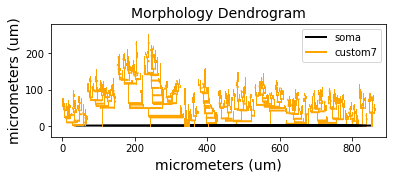

In [612]:
fig, ax = matplotlib_utils.get_figure()
matplotlib_impl.plot_dendrogram(m, ax)
matplotlib_utils.plot_style(fig=fig, ax=ax)